## Homework 2 - Model Selection and Regularization
In this homework, we will explore the need for regularization and cross validation. Your goal is to determine
the *true* model that exists in this superfluous data set. 

Just a quick reminder on how to submit homework solutions:
    
``` $ git add myhomeworksolutions.ipynb ```

``` $ git commit -m "added my homework 1 solutions" ```

``` $ git push origin master $ ```

Run the cell below to load the libraries

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
from sklearn.neighbors import KNeighborsRegressor

## Problem 1: Not So Nearest Neighbors

In this problem we look into the **curse of dimensionality**  (https://en.wikipedia.org/wiki/Curse_of_dimensionality).

Recall from lecture that when solving the ordinary least squares, the solution to 

$$\min_f \mathbb{E}_{y \lvert x} (y - f(x))^2,$$

is $$ f(x) = \mathbb{E}(y \lvert x).$$


As usual though, we only have access to the sampled data $(\mathbf{x}_i, y_i)$. Thus we seek to find (as seen in lecture)

$$ \hat f(x) :=  \hat{\mathbb{E}}(y \lvert x).$$

The simple approach which is the most natural way to estimate $f$ is to average $y_i$ over over observations $x_i$ such that $x_i=x$

$$ \hat{\mathbb{E}}(y \lvert x) = \frac{1}{N_{x_i=x}} \sum_{x_i, x_i=x} y_i,$$

where $N_{x_i=x}$ is the number of points such that $x_i=x$. **But we cannot do this since we only have access to the training data, not all $x$, and we generally have at most one instance of each $x_i$**. Thus we settle for

$$ \hat{\mathbb{E}}(y \lvert x) := \frac{1}{k} \sum_{x_i \in N_k(x)} y_i,$$

where $N_k(x)$ denotes the set of the $k$ closest points to $x$. 

### Goal of this problem:
To understand how the set $N_k(x)$ behaves as we increase the dimension. The intuition is that it's much harder to find points close to $x$ as we increase the *degrees of freedom* of our samples. We will see that this means we have to search larger distances to find these points, and these points may not reflect the value of $y_i$ well at all!

**[15 points]** a) Run the code below to create a sample from a $p$ dimensional uniform distribution, denoted $\mathcal{U}(-1,1)^p$.  



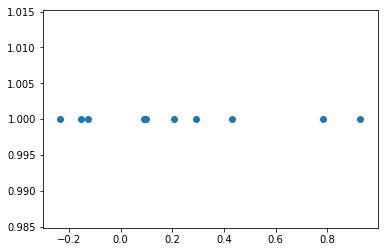

In [191]:
np.random.seed(0)
p=1
X=np.zeros(shape=(10,p))
for k in range(X.shape[1]):
    X[:,k] = np.random.uniform(-1,1,10)
plt.scatter(X[:,k] ,[1]*10)

What is the distance of $x=0$ to its nearest neighbor? You can use `np.min` and `np.abs` here. 

In [192]:
np.min(np.abs(X))

0.08976636599379373

Repeat the above but now for $p=2$ and make a scatter plot on $[-1,1] \times [-1,1]$. Use `X=np.zeros(shape=(10,p))` to initialize the matrix, and make sure that each row is a point sampled from a 2d uniform distribution (you can do this by setting each column to be sampled from a 1d uniform distribution). 

Finally, repeat the problem for various values of $p$, ($p=10,20,100$, etc. ). What do you notice about the distances? Can you explain why this may be happening?


0.4544595697006916
2.317856235009322
2.7297436355613893
5.754961720966945


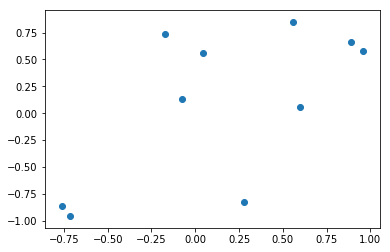

In [193]:
p=2
X=np.zeros(shape=(10,p))
for k in range(X.shape[1]):
    X[:,k] = np.random.uniform(-1,1,10)
x= X[:,0]
y=X[:,1]
plt.scatter(y,x)

def calc_distance(X,p):
    X=np.zeros(shape=(10,p))
    for k in range(X.shape[1]):
        X[:,k] = np.random.uniform(-1,1,10)
    
    for k in range(X.shape[0]):
        dis= sum(X[k,]**2)
        dis = (dis)**(1/2)
        dis= np.min(dis)       
    return(dis)

print(calc_distance(X,2))
print(calc_distance(X,10))
print(calc_distance(X,20))
print(calc_distance(X,100))



As the dimension increase, the min distance become larger. This is because the elements contribute to the distance become larger.

**[10 points]** b)  Let's do something more precise to find out what's happening. Assume that there are $N$ points which are uniformly distributed in a sphere in $\mathbb{R}^n$. Find the probabiltity that the nearest neighbor of the origin is at a distance larger than or equal to $r$ and show that it is

$$  P(y \geq R) = \left (1- r^p\right)^N.$$

You can assume the volume of the sphere in $\mathbb{R}^p$ is $C_pr^p$. 

**Hint:** First find the proability that given one point, that it is not within a ball of radius $r$ centered around the origin. Then use independence to find the case when there are $N$ points. 

**[5 points]** c) Given your solution to part a), what is the median of the above distribution? 

**[5 points]** d)  Make a plot of $(p, P(y \geq 1/2))$ for  $N=50$. What happens as $p \to +\infty$ for fixed $N$? (ie. the number of poitns is fixed, but the dimension tends to $+\infty$). What does this tell you? In other words, where are all of the points accumulating?

#### b/
 1.Given one point, the probability that it is not within a ball of radius $    r^p$ is $\mathbb{R}^p$ is $C_p(1-r^p)/C_p  = 1-r^p$. 
 
  2.Since N points are independent, we get the probability $$  P(y \geq R) = \left (1- r^p\right)^N.$$

 #### c/
we need to find r such that 
 $ (1-r^{p})^N  = 1/2$ 
 then $ r= (1- 0.5^{1/N})^{1/p} $

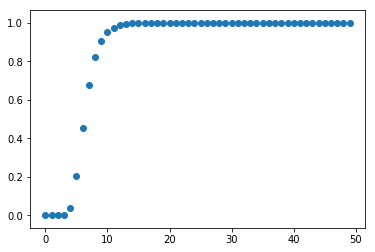

In [194]:
####d/
p = range(0,50)
y=X=np.zeros(50)
for i in p:
    y[i] = (1-(1/2)**i)**50
    

plt.scatter(p,y)

## As dimension increase, there will be no points within the distance of r. 
## This means that every point become an outlier eventually.
## So it is not appropriate to always use Euclidean distance. 

** [2 points] ** e) Run the code in the cell below. The second cell computes the nearest neighbors regressor for this data. 

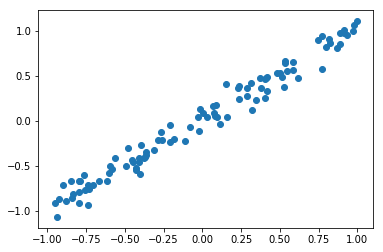

In [195]:

%matplotlib inline
X = np.random.uniform(-1,1,100)
epsilon = np.random.normal(0,0.1,100)
y = X + epsilon
plt.scatter(X,y)

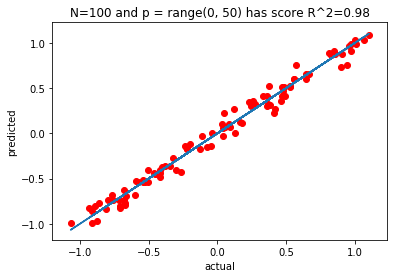

In [196]:
T = np.linspace(-1,1,1000)
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X.reshape(-1,1), y) 

y_hat = neigh.predict(X.reshape(-1,1))
r2 = round(neigh.score(X.reshape(-1,1),y),2)

plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("N=100 and p = {0} has score R^2={1}".format(p,r2))
plt.plot(y,y)
plt.scatter(y,y_hat,color='r')

**[10 points]** e) Repeat the above but for larger dimensions $p=10, 50, 100, 500$ so that the $N$ points are sampled from $\textrm{Unif}[-1,1]^p$ What happens to the scatter plot of predictions vs true values as the dimension increases? What happens to the $R^2$? Can you explain this in terms of your conclusions from the previous parts a) - c)?

In [213]:
def calc_rsquare(p):
    X=np.zeros(shape=(100,p))
    Y=np.zeros(shape=(100,1))
    for k in range(X.shape[1]):
        X[:,k] = np.random.uniform(-1,1,100)
    for k in range(100):
        Y[k,] = np.sum(X[k,])+ np.random.normal(0,0.1,1)
    T = np.linspace(-1,1,1000)
    neigh = KNeighborsRegressor(n_neighbors=2)
    neigh.fit(X, Y) 
    y_hat = neigh.predict(X)
    r2 = round(neigh.score(X,Y),2)
    return(r2)
print(calc_rsquare(20))
print(calc_rsquare(50))
print(calc_rsquare(100))
print(calc_rsquare(500))

0.74
0.65
0.65
0.61


Text(0.5,1,'N=100 and p = 1 has score R^2=0.99')

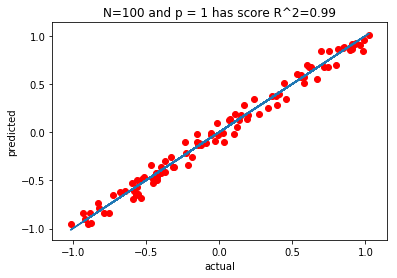

In [219]:
p=1
X=np.zeros(shape=(100,p))
Y=np.zeros(shape=(100,1))
for k in range(X.shape[1]):
    X[:,k] = np.random.uniform(-1,1,100)
for k in range(100):
    Y[k,] = np.sum(X[k,])+ np.random.normal(0,0.1,1)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, Y) 

y_hat = neigh.predict(X)
r2 = round(neigh.score(X,Y),2)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot(Y,Y)
plt.scatter(Y,y_hat,color='r')
plt.title("N=100 and p = {0} has score R^2={1}".format(p,r2))


Text(0.5,1,'N=100 and p = 10 has score R^2=0.88')

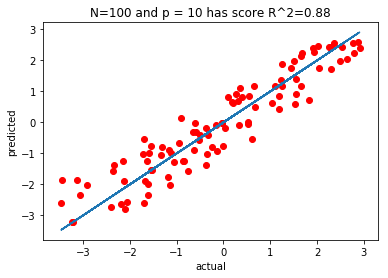

In [220]:
p=10
X=np.zeros(shape=(100,p))
Y=np.zeros(shape=(100,1))
for k in range(X.shape[1]):
    X[:,k] = np.random.uniform(-1,1,100)
for k in range(100):
    Y[k,] = np.sum(X[k,])+ np.random.normal(0,0.1,1)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, Y) 

y_hat = neigh.predict(X)
r2 = round(neigh.score(X,Y),2)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot(Y,Y)
plt.scatter(Y,y_hat,color='r')
plt.title("N=100 and p = {0} has score R^2={1}".format(p,r2))

Text(0.5,1,'N=100 and p = 50 has score R^2=0.73')

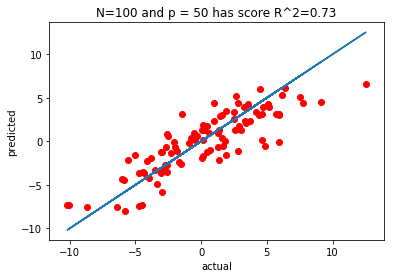

In [221]:
p=50
X=np.zeros(shape=(100,p))
Y=np.zeros(shape=(100,1))
for k in range(X.shape[1]):
    X[:,k] = np.random.uniform(-1,1,100)
for k in range(100):
    Y[k,] = np.sum(X[k,])+ np.random.normal(0,0.1,1)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, Y) 

y_hat = neigh.predict(X)
r2 = round(neigh.score(X,Y),2)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot(Y,Y)
plt.scatter(Y,y_hat,color='r')
plt.title("N=100 and p = {0} has score R^2={1}".format(p,r2))

Text(0.5,1,'N=100 and p = 100 has score R^2=0.61')

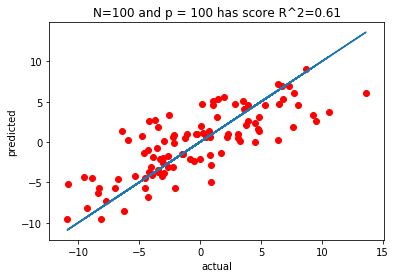

In [222]:
p=100
X=np.zeros(shape=(100,p))
Y=np.zeros(shape=(100,1))
for k in range(X.shape[1]):
    X[:,k] = np.random.uniform(-1,1,100)
for k in range(100):
    Y[k,] = np.sum(X[k,])+ np.random.normal(0,0.1,1)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, Y) 

y_hat = neigh.predict(X)
r2 = round(neigh.score(X,Y),2)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot(Y,Y)
plt.scatter(Y,y_hat,color='r')
plt.title("N=100 and p = {0} has score R^2={1}".format(p,r2))

Text(0.5,1,'N=100 and p = 500 has score R^2=0.57')

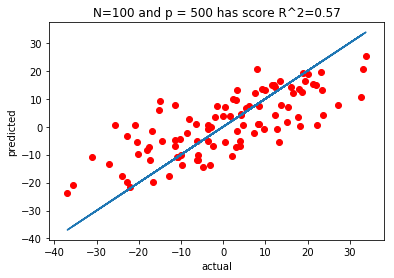

In [223]:
p=500
X=np.zeros(shape=(100,p))
Y=np.zeros(shape=(100,1))
for k in range(X.shape[1]):
    X[:,k] = np.random.uniform(-1,1,100)
for k in range(100):
    Y[k,] = np.sum(X[k,])+ np.random.normal(0,0.1,1)
T = np.linspace(-1,1,1000)
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, Y) 
y_hat = neigh.predict(X)
r2 = round(neigh.score(X,Y),2)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot(Y,Y)
plt.scatter(Y,y_hat,color='r')
plt.title("N=100 and p = {0} has score R^2={1}".format(p,r2))

What happens to the scatter plot of predictions vs true values as the dimension increases? :
The scatter plot become more disperse when dimension increase

What happens to the R2?  The R2 become less when p increase.

Can you explain this in terms of your conclusions from the previous parts a) - c)?

1.As the number of dimensions increases,the curse of dimensionality is the median distance from the origin approaches the boundary of the space.

2.As p increases, all points become outliers. This is because the volume of a hypercube with p dimensions and unit side increases much faster than the volume of a hypersphere.

3.In  kNN, depending upon the distance metric used, as we increase the number of dimensions,more points will have equal distance to origin(too many points are the "same" in the sense of Euclidean distance). for example : (1,2,3), (1,3,2), (2,1,3), (2,3,1), (3,2,1), (3,1,2) all have the same distance from the origin.

4.Therefore, the prediction power of KNN algorithm become smaller.

## Problem 2: Manual Model Selection

In this exercise, we have data which is sampled from a distribution which takes the form:
 $$y = \beta^T \cdot x + \epsilon.$$
 
 We are not told in advance what $\beta$ is though. That's up to you to discover. 

**[5 points]** a) Load the data `hw3.csv` into a Pandas dataframe located in `data/` in the course repository. Set $X$ to be the variables $0, \cdots, 50$ and $y$ to be the $y$ variable. 

In [229]:
import pandas as pd
df = pd.read_csv('hw3.csv')
X = df.iloc[:,0:50]
y = df['y']

**[5 points]** b) Compute the covariance matrix of $X$ (ie. $X^TX$). What does this tell you about the features?

In [230]:
cov = np.transpose(X).dot(X)
cov

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000e+00,-6.796716e-17,-1.388724e-16,-4.852363e-16,-4.786271e-16,3.200699e-16,-3.459937e-16,3.911572e-17,-4.011457e-16,-3.375371e-16,...,-1.006831e-16,2.494535e-16,-5.669516e-17,7.324731e-17,-3.831182e-16,1.825750e-16,-1.910029e-16,1.503145e-16,-3.367268e-17,2.362967e-16
1,-6.796716e-17,1.000000e+00,-1.664632e-16,3.762654e-16,-1.968781e-16,6.597226e-17,-4.705174e-17,-4.568235e-17,-3.477313e-16,-2.643844e-16,...,5.115636e-17,-6.162148e-17,-1.847156e-16,8.756882e-17,-3.495575e-17,2.520885e-17,-5.234542e-17,2.993724e-17,-8.457725e-17,-4.378128e-17
2,-1.388724e-16,-1.664632e-16,1.000000e+00,3.087921e-16,-1.185127e-16,-8.061816e-17,-1.542485e-16,6.838618e-17,4.375210e-17,1.647512e-16,...,2.768245e-17,1.636411e-16,-1.214423e-16,3.306010e-16,1.370105e-16,-2.634191e-17,1.126896e-17,3.862241e-16,-2.348881e-17,6.005145e-17
3,-4.852363e-16,3.762654e-16,3.087921e-16,1.000000e+00,4.757150e-16,3.503701e-18,2.875758e-16,3.358678e-17,-7.245752e-17,-2.094831e-16,...,3.434164e-17,-1.404982e-16,2.103349e-16,-3.544740e-16,9.882625e-17,8.694619e-17,3.293776e-17,-1.378419e-16,5.886061e-18,-1.967988e-16
4,-4.786271e-16,-1.968781e-16,-1.185127e-16,4.757150e-16,1.000000e+00,-1.854967e-16,-6.614286e-17,3.533050e-17,-4.065052e-16,3.929117e-16,...,-2.544070e-17,1.165596e-16,-1.319565e-16,1.493340e-16,-1.980841e-16,-2.856708e-16,1.273270e-16,2.877714e-16,1.641144e-16,1.702177e-16
5,3.200699e-16,6.597226e-17,-8.061816e-17,3.503701e-18,-1.854967e-16,1.000000e+00,2.006672e-16,1.191399e-16,-2.821536e-17,6.214118e-17,...,-1.881522e-16,1.479244e-17,5.043686e-17,-1.106949e-16,5.829765e-17,-1.383884e-16,8.730097e-17,-1.804153e-16,7.563586e-17,-7.506028e-17
6,-3.459937e-16,-4.705174e-17,-1.542485e-16,2.875758e-16,-6.614286e-17,2.006672e-16,1.000000e+00,1.681046e-16,-3.179430e-18,-2.450568e-16,...,2.056913e-16,4.227936e-16,1.996306e-16,8.835951e-17,-1.676942e-16,-1.088925e-16,-2.577011e-16,-7.974163e-18,-6.734118e-17,2.822964e-16
7,3.911572e-17,-4.568235e-17,6.838618e-17,3.358678e-17,3.533050e-17,1.191399e-16,1.681046e-16,1.000000e+00,1.778133e-16,2.627395e-16,...,1.442414e-16,1.095239e-17,1.380004e-16,1.359926e-16,-1.856902e-17,1.344934e-16,-2.872714e-17,-2.363458e-16,-1.805108e-16,-3.060327e-16
8,-4.011457e-16,-3.477313e-16,4.375210e-17,-7.245752e-17,-4.065052e-16,-2.821536e-17,-3.179430e-18,1.778133e-16,1.000000e+00,-1.975277e-16,...,-1.627617e-16,4.249234e-17,1.511168e-16,2.262935e-16,-2.406489e-16,-1.485844e-16,-5.092478e-17,-1.667052e-16,1.100605e-16,1.761879e-17
9,-3.375371e-16,-2.643844e-16,1.647512e-16,-2.094831e-16,3.929117e-16,6.214118e-17,-2.450568e-16,2.627395e-16,-1.975277e-16,1.000000e+00,...,-2.425278e-17,5.283437e-17,1.310055e-16,-1.797993e-16,1.233856e-16,-3.345869e-17,-2.655834e-17,-5.301399e-17,-2.573895e-17,-3.969327e-18


most of the terms of the covariance matrix are small.

**[10 points]** c) Starting $k$ from 1 and ranging to 50 (the total number of features), build a linear regression model  for $X[:,0:k]$ (where this denotes the matrix restricted to the first k columns), and plot the predictions against the actual values.  What happens as the number of features included increases? Why is this not surprising given what you know about linear alegbra and part b)? Recalling Homework 0 Problem 2 may be helpful. 

The following code will be useful:

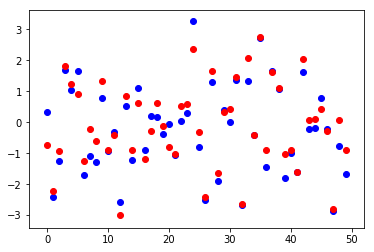

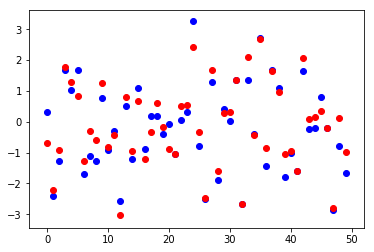

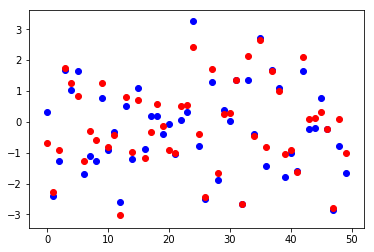

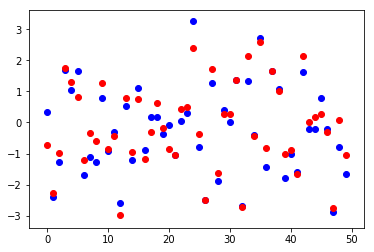

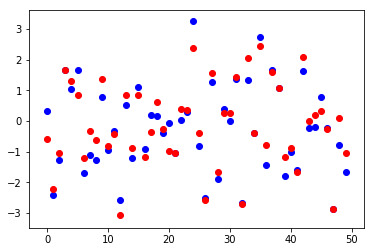

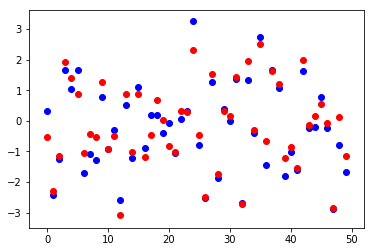

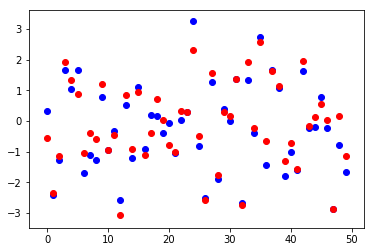

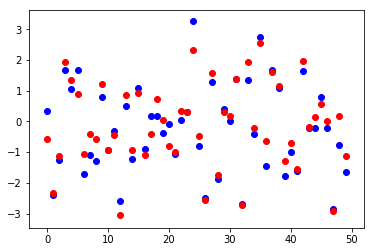

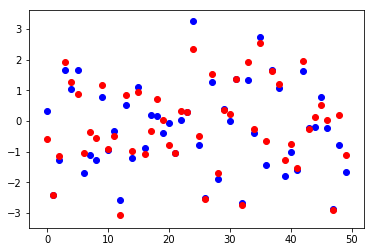

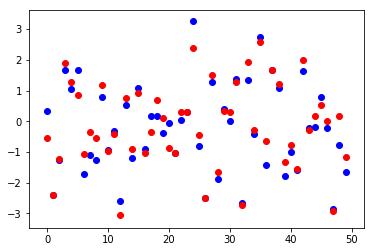

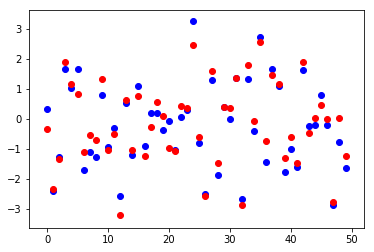

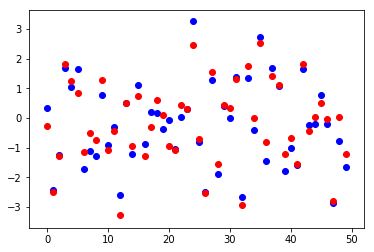

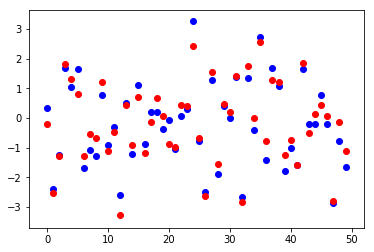

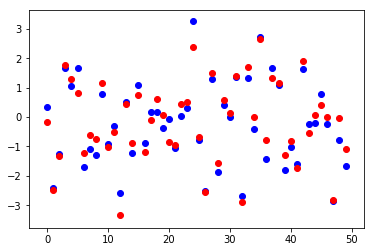

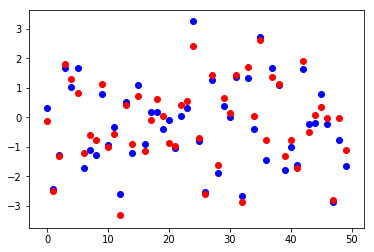

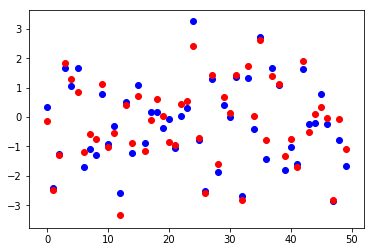

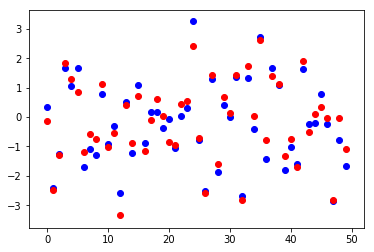

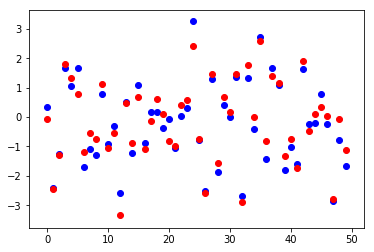

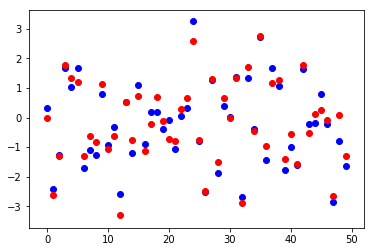

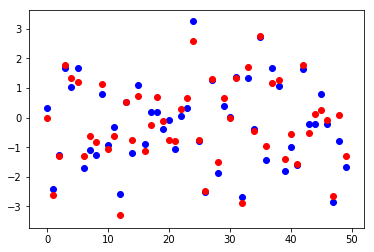

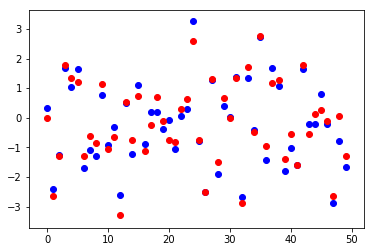

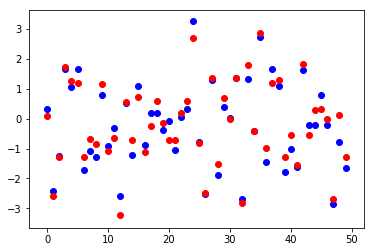

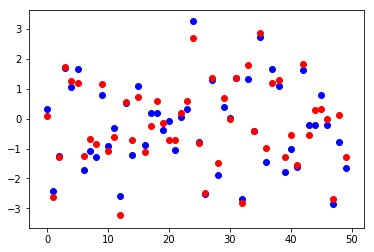

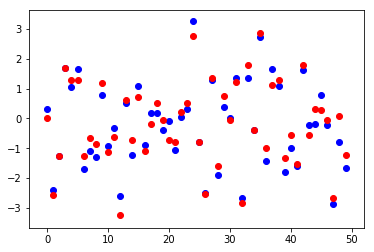

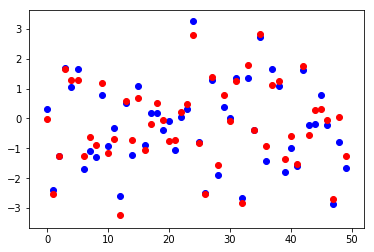

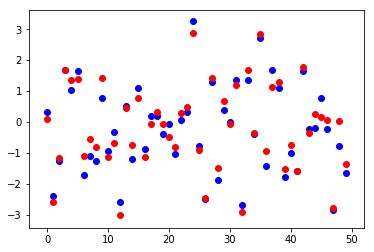

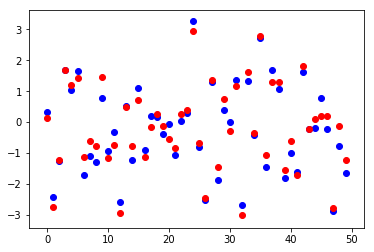

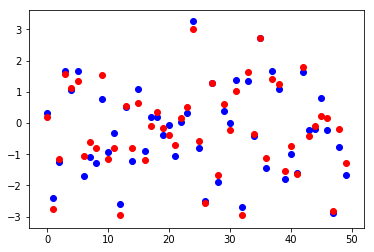

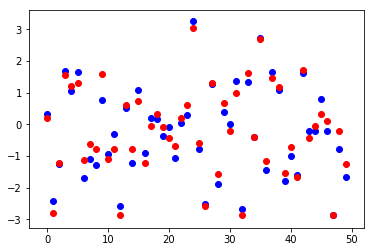

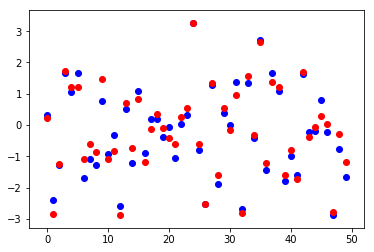

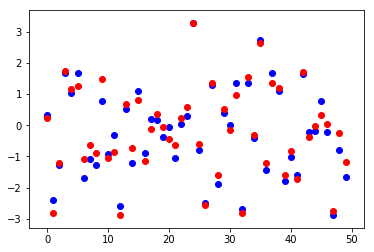

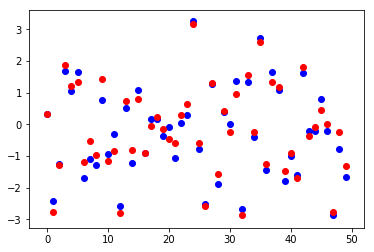

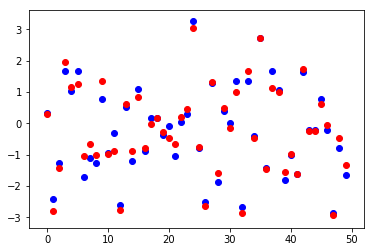

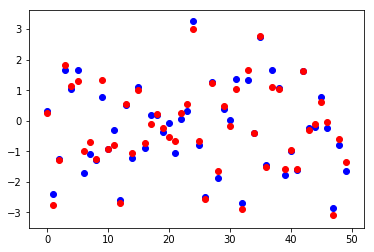

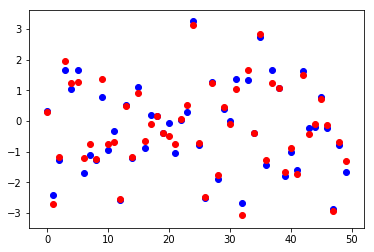

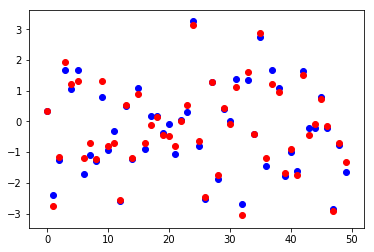

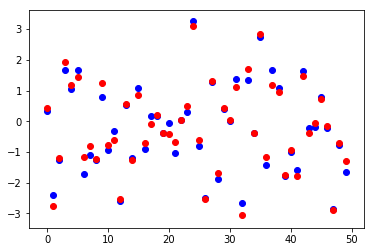

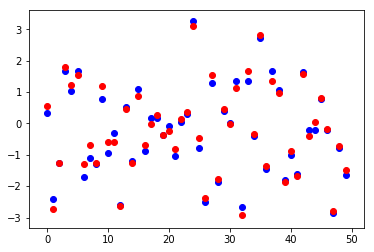

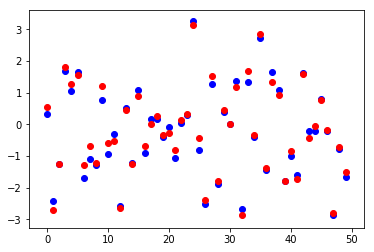

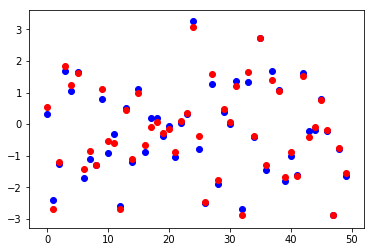

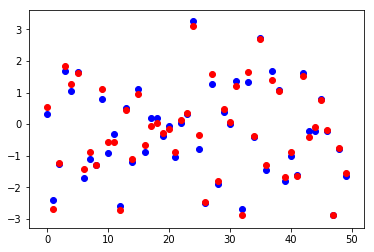

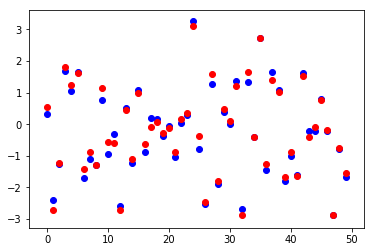

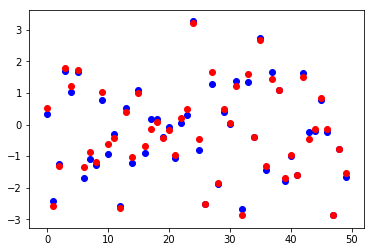

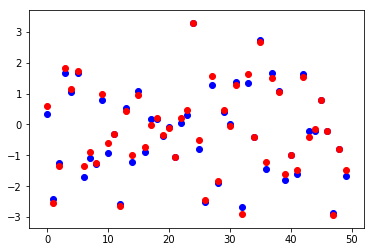

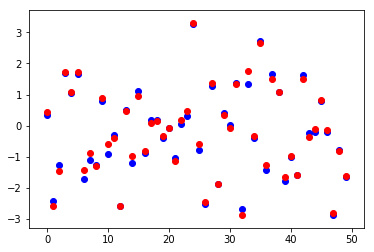

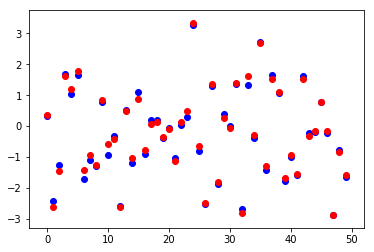

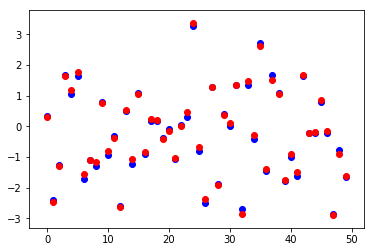

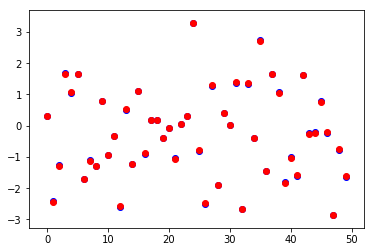

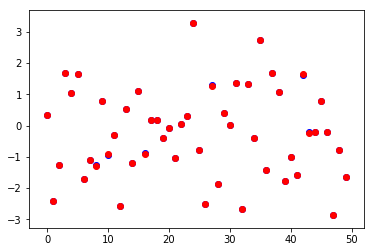

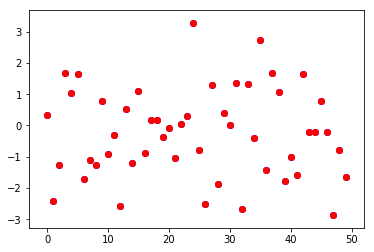

In [255]:
from sklearn import datasets, linear_model

for d in range(0,50):
    x0= np.linspace(0, 49, 50)
    X1=X.loc[:,'0':str(d)]
    # Train the model here using regr = linear_model.LinearRegression(fit_intercept=False)
    regr = linear_model.LinearRegression(fit_intercept=False).fit(X1,y)
    y_pred = regr.predict(X1)
    plt.scatter(x0,y,color='b')
    plt.scatter(x0,y_pred,color='r')
    plt.show()

### What happens as the number of features included increases?
As the number of features increased, the predicted value become exactly the same
with real value.

Why is this not surprising given what you know about linear alegbra and part b)? 

When we have n features, which is exactly equal to the number of responses, we can solve for $ \beta $ analyticaly since X'X is invertible. Then we will get the same value as real value for our predicted one.(overfitting) Thus we cannot test the model, then we will need to split the data. 


** [10 points] ** d) Split the data randomly into 80% training and 20% testing using `test_train_split` in Python. Repeat part c) on the training data, and
plot the $R^2$ of the model on the training and testing data against the number of features used. What happens to the training and testing error as you do this?

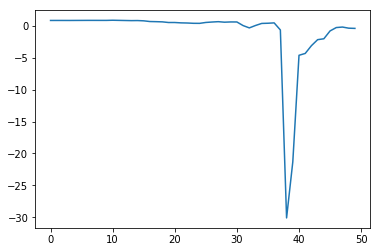

In [256]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
Rsquare=[]
for d in range(0,50):
    X1=X.loc[:,'0':str(d)]  
    X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size =0.2, random_state=42)
    regr = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)
    Rsquare.append(regr.score(X_test, y_test))
Rsquare
plt.plot(Rsquare)

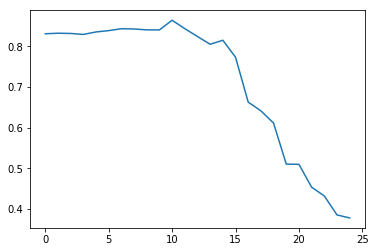

In [257]:
plt.plot(Rsquare[0:25])

** [ 10 points] ** e) We would like to select the optimal subset of features which perform best on unseen data. If we were to evaluate all possible subsets of features out of $k$ features, what would the number of combinations be? Is this computationally feasible? 


**Hint:** What is the number of ways you can choose $m$ features out of $k$ total possible features? This is a common combinatorial expression. What happens when you sum this expression over $m$? The Theorem Statement of the Binomial Theorem here may be helpful: https://en.wikipedia.org/wiki/Binomial_theorem


We are acutally summing the $$  \sum_{m=0}^{m=k} {k \choose m} =  \sum_{m=0}^{m=k} {k \choose m} 1^m  =(1+1)^k = 2^k $$

The number of ways become so large that it is difficult to exhaust every choice.

## Problem 3:  Ridge Regularization 

As an alternative approach, we can simply penalize the size of the coefficients in a way which minimizes our norm.

$$ \hat F_{\lambda}(\beta) :=  \|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2 + \lambda \|\beta\|_{L^2}^2. $$



**[5 points]** a) Do we need to scale our data in this case?

In [69]:
from sklearn import preprocessing
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

Yes because the parameters may not shrink fair if  they don't have the same scale.

**[10 points]** a) 

Use our solution from class,

$$\beta_{\alpha} = (X^TX + \lambda I)^{-1}X^Ty$$

compute $\beta$ for an arbitrary value of $\alpha > 0$. 

If using the scaled X, we will get:

In [245]:
def beta(lamda):
    I = np.identity(50)
    cov = np.transpose(X_scaled).dot(X_scaled)
    Xtranseposey = np.transpose(X_scaled).dot(y_scaled)
    beta = np.linalg.inv(cov+ lamda*I).dot(Xtranseposey)
    return (beta)
beta(0.000001)

array([ 9.44367132e-01, -6.75996741e-03, -2.10377677e-03,  5.84684522e-03,
        3.27319269e-02, -8.63371649e-02,  4.82219618e-02,  1.76139978e-02,
       -1.55626549e-02,  4.03607813e-03, -4.49958276e-02, -1.82735585e-03,
        5.22566840e-02,  4.21941630e-02,  4.85911099e-02, -5.85152334e-03,
       -3.51871520e-03,  3.03524549e-02,  9.03860441e-02, -9.10882267e-03,
        1.44557690e-02,  8.50764526e-02,  2.62659169e-02, -9.04774195e-03,
        9.84846490e-03, -8.92935575e-02, -4.46296244e-02, -2.74483142e-02,
       -6.53324253e-02, -5.14879471e-02,  1.23832117e-02,  6.24198906e-02,
        2.63912644e-02,  4.80622142e-02, -7.65336548e-02, -5.25035257e-04,
        6.36417772e-02,  1.10173064e-01,  3.76045498e-02, -3.74465029e-02,
        6.64624438e-03, -2.95183169e-02,  5.06824785e-02,  6.02413247e-02,
        5.43593436e-03, -2.02103896e-02,  6.79198598e-02,  3.25918543e-03,
        8.95459386e-03,  2.21307879e-03])

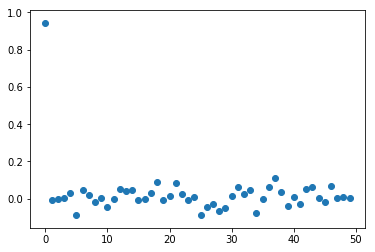

In [246]:
plt.scatter(np.linspace(0, 49, 50),beta(0.000001))

**[10 points]** b) Now repeat a) using `sklearn`'s `Ridge` method. But this time, use `test_train_split` to seperate
into training and testing data. Then evaluate performance for different values of $\alpha$. Can you find an $\alpha$ which has the best performance? 

C:\Users\59381\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.200184223868724e-17 / 1.1102230246251565e-16
  RuntimeWarning)


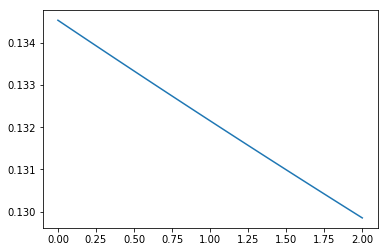

In [241]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.2, random_state=42)

X_scaled1 = preprocessing.scale(X_train)
y_scaled1 = preprocessing.scale(y_train)
X_scaledtest = preprocessing.scale(X_test)
y_scaledtest =  preprocessing.scale(y_test)
alphas = np.linspace(0, 2, 50)
scores=[]

for alpha in alphas:
    clf = Ridge(alpha=alpha)
    clf.fit(X_scaled1, y_scaled1) 
    scores.append(clf.score(X_scaledtest, y_scaledtest))

plt.plot(alphas,scores)


It seems that the prediction power is very bad. 

**[10 points]** c) What do the coefficients look like for this optimal solution? You can answer this by plotting. Most importantly, do the maginitudes seem roughly comparable?

C:\Users\59381\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.687326760384006e-17 / 1.1102230246251565e-16
  RuntimeWarning)


array([ 9.43063505e-01, -1.08555022e-02, -6.07180546e-04,  4.17811628e-03,
        3.13040973e-02, -8.73733253e-02,  4.96762481e-02,  1.98174565e-02,
       -1.49349053e-02,  1.64896370e-03, -4.15535218e-02, -5.99448214e-03,
        5.22884395e-02,  4.24331603e-02,  5.12107296e-02, -7.15800087e-03,
       -3.86087609e-03,  3.12793736e-02,  8.95033009e-02, -1.01458313e-02,
        1.52429903e-02,  8.95396488e-02,  2.85578737e-02, -6.99545820e-03,
        8.92912869e-03, -9.06849773e-02, -4.27855326e-02, -2.43940562e-02,
       -6.83440697e-02, -5.17486943e-02,  1.21859360e-02,  6.28470460e-02,
        2.16623824e-02,  4.70988160e-02, -7.67673590e-02, -2.95827544e-03,
        6.59643645e-02,  1.13791907e-01,  3.91815138e-02, -3.61937089e-02,
        6.53896673e-03, -3.15110604e-02,  5.08325467e-02,  6.17939170e-02,
        1.39942255e-03, -1.88456812e-02,  6.81108054e-02, -1.54146173e-03,
        8.44830936e-03,  2.22486126e-03])

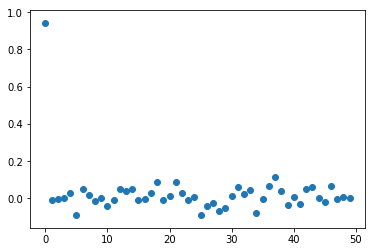

In [242]:
clf = Ridge(alpha=0)
clf.fit(X_scaled, y_scaled) 

plt.scatter(np.linspace(0, 49, 50),clf.coef_)
clf.coef_

One of the coefficient is especially larger than others in absolute value.
And also, their magnitude seems not comparable.

## Problem 3: Lasso Reguarlization 

$$ \hat F_{\lambda}(\beta) :=  \|\mathbf{y} - \mathbf{X} \beta\|_{L^2}^2 + \lambda \|\beta\|_{L^1}, $$


a) Now repeat Problem 2 b) using `sklearn`'s `Lasso` method. How does the optimal performance seem to compare to that of `Ridge`? Ensure you are training on training data and evaluating on testing data. 

C:\Users\59381\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\59381\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


array([ 0.82867607,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

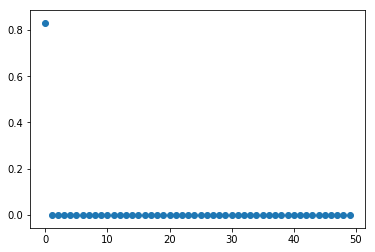

In [84]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size =0.2, random_state=42)

X_scaled1 = preprocessing.scale(X_train)
y_scaled1 = preprocessing.scale(y_train)
X_scaledtest = preprocessing.scale(X_test)
y_scaledtest =  preprocessing.scale(y_test)

alphas = np.linspace(0, 1, 50)
scores=[]

for alpha in alphas:
    LASSO = Lasso(alpha=alpha)
    LASSO.fit(X_scaled1, y_scaled1) 
    scores.append(LASSO.score(X_scaledtest, y_scaledtest))
best =np.argmax(scores)
LASSO1 = Lasso(alpha=alphas[best])
LASSO1.fit(X_scaled, y_scaled) 
plt.scatter(np.linspace(0, 49, 50),LASSO1.coef_)
LASSO1.coef_

0.12244897959183673
0.8628312391719645


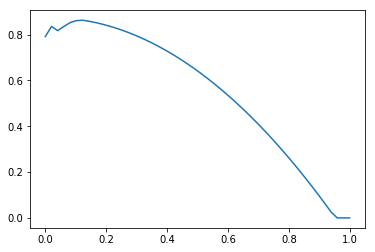

In [85]:
plt.plot(alphas,scores)
best =np.argmax(scores)
print(alphas[best])
print(scores[best])

The best alpha I found was about 0.122. Compared to the Ridge method, most of the parameters shrink exactly to 0. And the R square value at the best lambda level is about 0.862.

b) What do the coefficients look like for the optimal $\lambda$ found above? How can you interpret this based on the level sets of $L^1$?

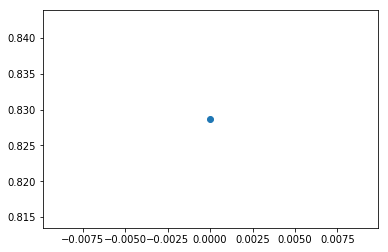

In [86]:
coef = LASSO1.coef_[ LASSO1.coef_ > 0]
coef
plt.scatter(np.linspace(0, 0, 1),coef)

Only 1 parameters left as the graph shown above. And other parametes goes to zero.

1. If we see the LASSO and ridge in a Lagrange multiplier optimization problem, LASSO has a square shape constraint while ridge regression has a circle shape. When we are minimizing the target, it will be like finding the intersect between an concentric ellipse with either circle or square.
2. For the square case, we find the optima tend to distributed densely along axes, where the vertex of square is also on the axes. (which means the parameters will be exactly 0).
3. For the circle case, the solution does not distributed densely along the axis.